In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Komentarze

##### Algorithm 1



##### Algorithm 3

a) Nie potrzebna jest żadna ochrona danych wspólnych. Każdy wątek operuje na własnych wyznaczonych danych.  Nawet przy zapisie synchronicznie wyznaczone zostały
indeksy na których operuje każdy wątek. 

b) Złożoności:

Fill    = $O(n) = O((n/p) * p)$

Distrib = $O(n) = O(n + m * n/m) = O(p*[(n/p) + m * (n/p)])$

Sort    = $O(n) = O(m * (n/m)) = O(p * m * (n/pm))$  |> Non uniform  $O(n * ln(n)) = O(m * (n/m) * ln(n/m)) = O(p * m * (n/pm) ( ln(n/pm)))$

SeqIndex = $(n)$

Rewrite = $O(n) = O(m * (n/m)) = O(p * m * (n/pm))$

Praca = złożoność algorytmu

Sekwencyjnie efektywny (stały współ. = 1)

### Wczytanie danych

In [36]:
df_r = pd.read_csv('output_r.csv', delimiter=',') ## algorytm 1
df_s = pd.read_csv('output_s.csv', delimiter=',') ## algorytm 3

In [37]:
df_r

,size,bucket,threads,fill,distrib,sort,rewrite,all,is_sorted
0,5000000,5000000,1,0.047293,2.280250,0.806618,0.755693,3.918643,1
1,5000000,5000000,2,0.026344,1.177475,0.412922,0.382531,2.014699,1
2,5000000,5000000,3,0.019667,0.850977,0.286425,0.249785,1.424167,1
3,5000000,5000000,4,0.017675,0.669873,0.205177,0.190952,1.093145,1
4,5000000,5000000,5,0.014228,0.576386,0.173715,0.149002,0.921637,1
...,...,...,...,...,...,...,...,...,...
67,15000000,3872,4,0.052329,0.408150,1.429473,0.042380,1.932354,1
68,15000000,3872,5,0.024966,0.198420,0.981923,0.049258,1.254599,1
69,15000000,3872,6,0.042771,0.349371,0.909403,0.040674,1.342248,1
70,15000000,3872,7,0.037759,0.330768,0.934856,0.031460,1.334870,1


In [38]:
df_s

,size,bucket,threads,fill,distrib,sort,rewrite,all,is_sorted
0,5000000,5000000,1,0.049022,4.989558,0.545803,0.138220,5.722604,1
1,5000000,5000000,2,0.025554,2.633659,0.252479,0.084126,2.995820,1
2,5000000,5000000,3,0.019506,1.857466,0.182095,0.063036,2.122106,1
3,5000000,5000000,4,0.019499,1.455920,0.142284,0.055343,1.673049,1
4,5000000,5000000,5,0.019662,1.410003,0.125424,0.068956,1.624048,1
...,...,...,...,...,...,...,...,...,...
67,15000000,3872,4,0.046950,0.387783,1.336750,0.020247,1.791732,1
68,15000000,3872,5,0.051222,0.397405,1.149045,0.020675,1.618349,1
69,15000000,3872,6,0.036577,0.520850,0.881489,0.023336,1.462255,1
70,15000000,3872,7,0.031032,0.482037,0.792568,0.018328,1.324039,1


### Sprawdzenie czy za każdym razem tablice zostały poprawnie posortowane

In [39]:
(df_r['is_sorted'] == 1).all()

True

In [40]:
(df_s['is_sorted'] == 1).all()

True

S == Y

In [41]:
# Perform inner join based on size, bucket, and threads columns
merged_df = pd.merge(df_r, df_s, on=['size', 'bucket', 'threads'], how='inner')

# Drop the 'is_sorted_x' and 'is_sorted_y' columns
merged_df.drop(['is_sorted_x', 'is_sorted_y'], axis=1, inplace=True)

# Rearrange the columns
column_order = ['size', 'bucket', 'threads', 'fill_x', 'fill_y', 'distrib_x', 'distrib_y', 'sort_x', 'sort_y', 'rewrite_x', 'rewrite_y', 'all_x', 'all_y']
merged_df = merged_df[column_order]

# Display the modified merged dataframe
merged_df

# Split the merged DataFrame into three based on 'size'
merged_df_small = merged_df[merged_df['size'] == 5000000]
merged_df_medium = merged_df[merged_df['size'] == 10000000]
merged_df_large = merged_df[merged_df['size'] == 15000000]

In [42]:
print("DataFrame for size 5000000:")
merged_df_small

DataFrame for size 5000000:


,size,bucket,threads,fill_x,fill_y,distrib_x,distrib_y,sort_x,sort_y,rewrite_x,rewrite_y,all_x,all_y
0,5000000,5000000,1,0.047293,0.049022,2.280250,4.989558,0.806618,0.545803,0.755693,0.138220,3.918643,5.722604
1,5000000,5000000,2,0.026344,0.025554,1.177475,2.633659,0.412922,0.252479,0.382531,0.084126,2.014699,2.995820
2,5000000,5000000,3,0.019667,0.019506,0.850977,1.857466,0.286425,0.182095,0.249785,0.063036,1.424167,2.122106
3,5000000,5000000,4,0.017675,0.019499,0.669873,1.455920,0.205177,0.142284,0.190952,0.055343,1.093145,1.673049
4,5000000,5000000,5,0.014228,0.019662,0.576386,1.410003,0.173715,0.125424,0.149002,0.068956,0.921637,1.624048
5,5000000,5000000,6,0.014751,0.015028,0.490604,1.399508,0.152396,0.113514,0.131429,0.053431,0.797979,1.581484
6,5000000,5000000,7,0.018997,0.021775,0.445059,1.080683,0.126448,0.097117,0.115020,0.048943,0.713015,1.248520
7,5000000,5000000,8,0.013341,0.032546,0.444921,1.099978,0.113597,0.088502,0.098568,0.047208,0.676968,1.268237
8,5000000,1,1,0.047418,0.048259,0.108594,0.248553,2.914850,3.026106,0.054600,0.031512,3.125467,3.354432
9,5000000,2,2,0.026954,0.033728,0.156876,0.270933,1.384116,1.469774,0.033776,0.011946,1.601728,1.786383


In [43]:
print("\nDataFrame for size 10000000:")
merged_df_medium


DataFrame for size 10000000:


,size,bucket,threads,fill_x,fill_y,distrib_x,distrib_y,sort_x,sort_y,rewrite_x,rewrite_y,all_x,all_y
24,10000000,10000000,1,0.097137,0.096837,4.833145,10.624875,1.698263,0.996956,1.626675,0.272527,8.320144,11.991198
25,10000000,10000000,2,0.057276,0.049071,2.465880,6.023958,0.839048,0.503643,0.788829,0.172443,4.181172,6.749117
26,10000000,10000000,3,0.035812,0.055576,1.728155,4.263883,0.551278,0.369469,0.503283,0.148422,2.844145,4.837352
27,10000000,10000000,4,0.033534,0.042610,1.348461,3.342162,0.430817,0.323460,0.406232,0.133297,2.240491,3.841532
28,10000000,10000000,5,0.029623,0.030279,1.161318,2.793130,0.354483,0.387294,0.325747,0.144176,1.889384,3.354883
29,10000000,10000000,6,0.025651,0.021813,0.979209,2.537224,0.300812,0.168928,0.275573,0.104924,1.597618,2.832892
30,10000000,10000000,7,0.051098,0.041475,0.925697,2.241187,0.254624,0.188124,0.236557,0.095641,1.482523,2.566429
31,10000000,10000000,8,0.050533,0.040883,0.895367,4.413595,0.245605,0.183592,0.214032,0.090916,1.417793,4.728989
32,10000000,1,1,0.100307,0.101159,0.246761,0.504527,5.555163,6.009009,0.106621,0.048329,6.008858,6.663027
33,10000000,2,2,0.054738,0.051920,0.328166,0.498213,2.886563,3.031069,0.054714,0.032269,3.324187,3.613473


In [44]:
print("\nDataFrame for size 15000000:")
merged_df_large


DataFrame for size 15000000:


,size,bucket,threads,fill_x,fill_y,distrib_x,distrib_y,sort_x,sort_y,rewrite_x,rewrite_y,all_x,all_y
48,15000000,15000000,1,0.151770,0.155710,7.186739,17.386937,2.456735,1.467505,2.470430,0.392862,12.358629,19.403017
49,15000000,15000000,2,0.075089,0.077889,3.855239,9.046938,1.334469,0.804577,1.272836,0.253328,6.605503,10.182734
50,15000000,15000000,3,0.070237,0.062045,2.732422,7.227513,0.873006,0.560682,0.852724,0.205948,4.567173,8.056190
51,15000000,15000000,4,0.049998,0.058272,2.023333,5.320728,0.676796,0.453395,0.638993,0.212983,3.423100,6.045381
52,15000000,15000000,5,0.043919,0.023679,1.684951,3.438128,0.512782,0.239395,0.493800,0.116060,2.763766,3.817264
53,15000000,15000000,6,0.040498,0.044019,1.464816,4.355690,0.448745,0.293876,0.438973,0.162272,2.415797,4.855860
54,15000000,15000000,7,0.064881,0.046024,1.374842,3.803164,0.389322,0.273462,0.356414,0.146954,2.205528,4.269606
55,15000000,15000000,8,0.044793,0.043370,1.357409,3.583678,0.335152,0.224343,0.308807,0.137454,2.063803,3.988848
56,15000000,1,1,0.136668,0.137225,0.327037,0.734869,8.637451,9.417735,0.189962,0.088007,9.291126,10.377839
57,15000000,2,2,0.078710,0.083914,0.484148,0.736914,4.406409,4.815396,0.082709,0.053064,5.051982,5.689290


### Time vs number of threads

In [45]:
merged_df_large_1 = merged_df_large[merged_df_large['bucket'] == 15000000]
threads = merged_df_large_1['threads']
fill_x = merged_df_large_1['fill_x']
fill_y = merged_df_large_1['fill_y']
distrib_x = merged_df_large_1['distrib_x']
distrib_y = merged_df_large_1['distrib_y']
sort_x = merged_df_large_1['sort_x']
sort_y = merged_df_large_1['sort_y']
rewrite_x = merged_df_large_1['rewrite_x']
rewrite_y = merged_df_large_1['rewrite_y']
all_x = merged_df_large_1['all_x']
all_y = merged_df_large_1['all_y']

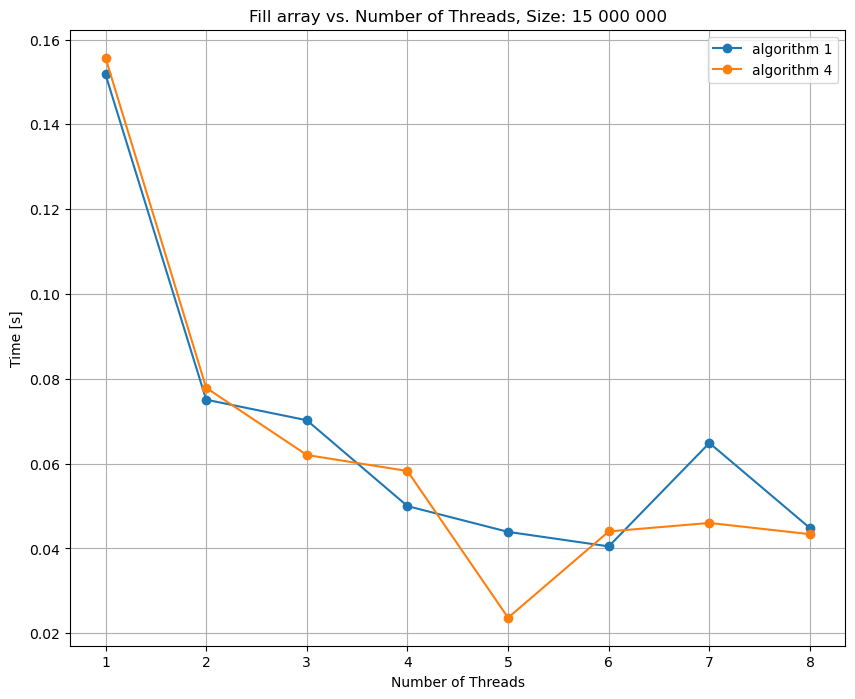

In [46]:
plt.figure(figsize=(10, 8))

plt.plot(threads, fill_x, marker='o', label='algorithm 1')
plt.plot(threads, fill_y, marker='o', label='algorithm 3')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('Fill array vs. Number of Threads, Size: 15 000 000')
plt.legend()
plt.grid(True)
plt.show()

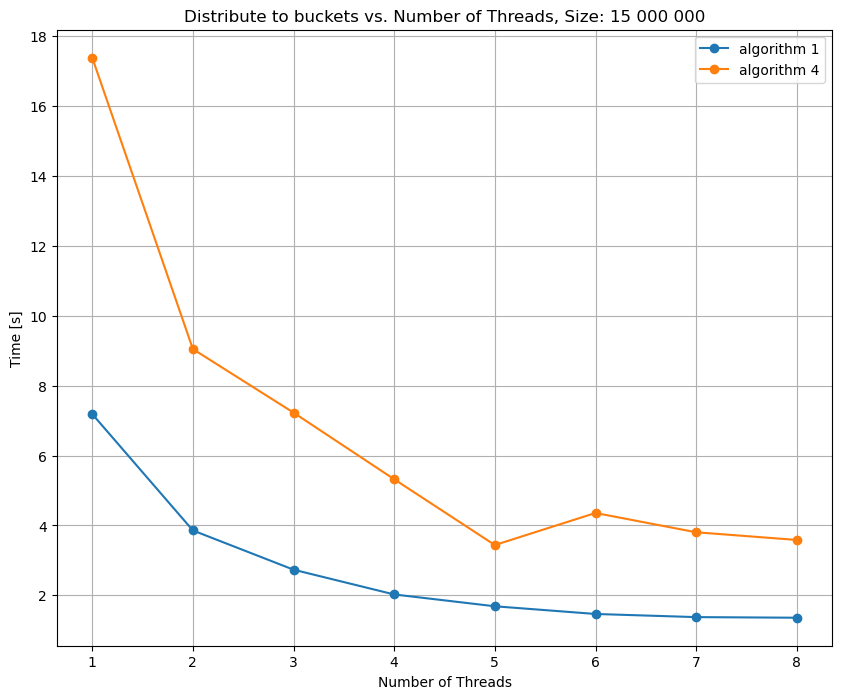

In [47]:
plt.figure(figsize=(10, 8))

plt.plot(threads, distrib_x, marker='o', label='algorithm 1')
plt.plot(threads, distrib_y, marker='o', label='algorithm 3')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('Distribute to buckets vs. Number of Threads, Size: 15 000 000')
plt.legend()
plt.grid(True)
plt.show()

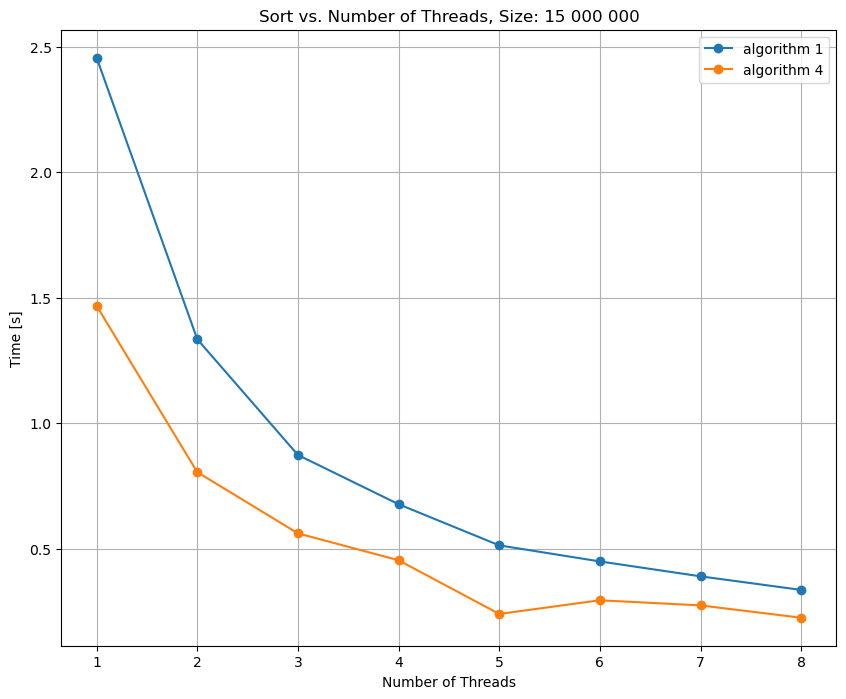

In [48]:
plt.figure(figsize=(10, 8))

plt.plot(threads, sort_x, marker='o', label='algorithm 1')
plt.plot(threads, sort_y, marker='o', label='algorithm 3')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('Sort vs. Number of Threads, Size: 15 000 000')
plt.legend()
plt.grid(True)
plt.show()

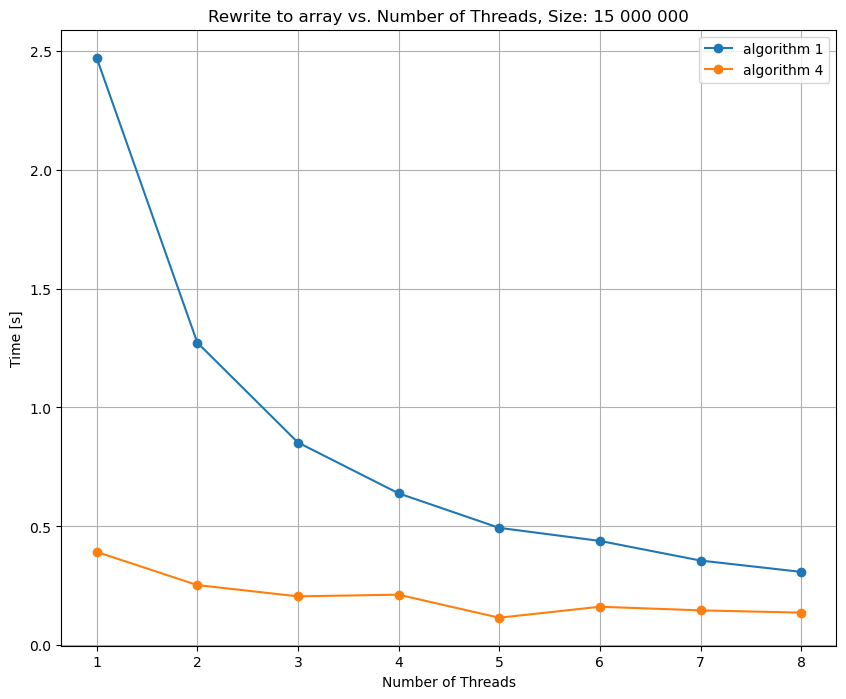

In [49]:
plt.figure(figsize=(10, 8))

plt.plot(threads, rewrite_x, marker='o', label='algorithm 1')
plt.plot(threads, rewrite_y, marker='o', label='algorithm 3')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('Rewrite to array vs. Number of Threads, Size: 15 000 000')
plt.legend()
plt.grid(True)
plt.show()

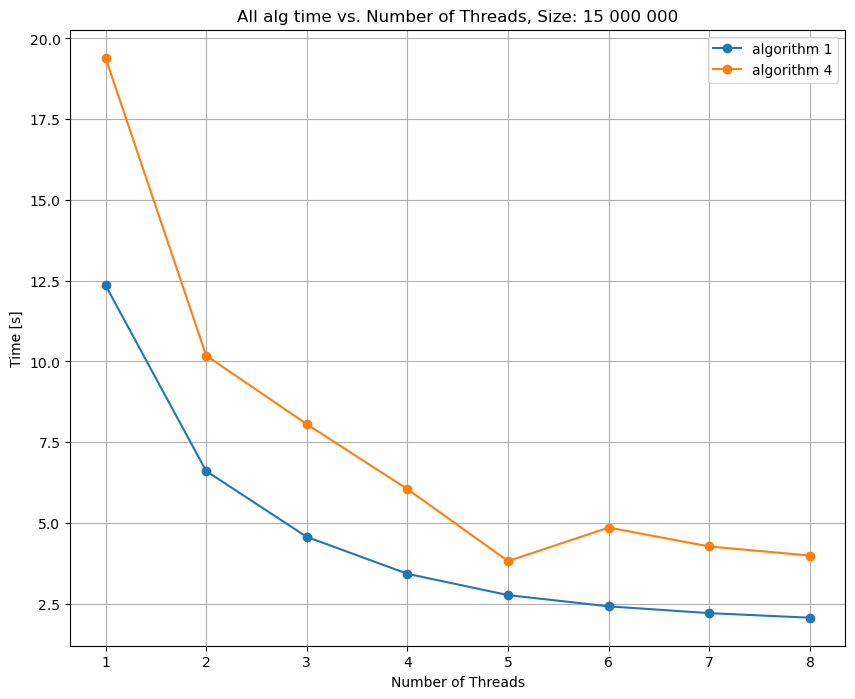

In [50]:
plt.figure(figsize=(10, 8))

plt.plot(threads, all_x, marker='o', label='algorithm 1')
plt.plot(threads, all_y, marker='o', label='algorithm 3')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('All alg time vs. Number of Threads, Size: 15 000 000')
plt.legend()
plt.grid(True)
plt.show()

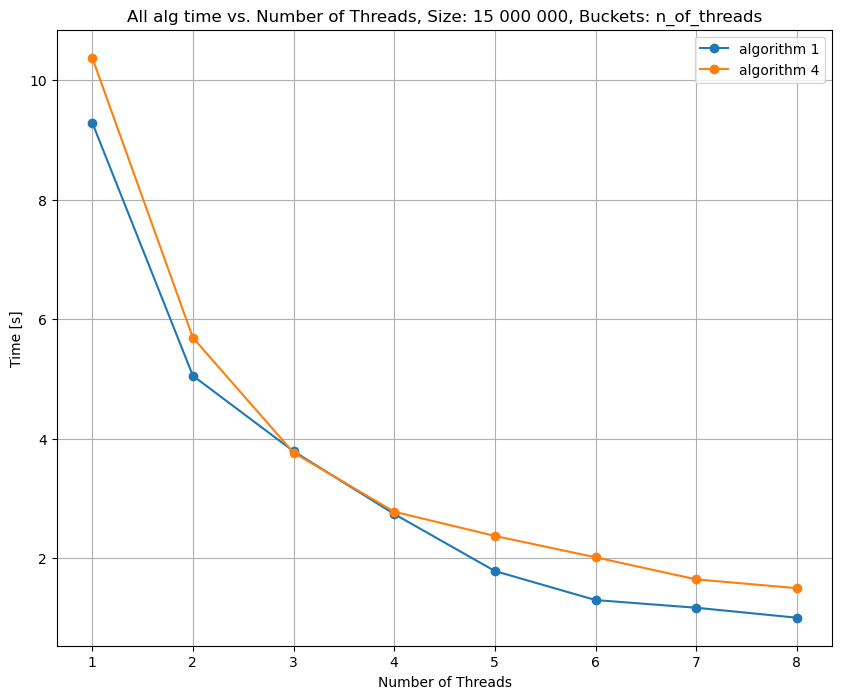

In [51]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == merged_df_large['threads']]
threads = merged_df_large_2['threads']
all_x = merged_df_large_2['all_x']
all_y = merged_df_large_2['all_y']

plt.figure(figsize=(10, 8))

plt.plot(threads, all_x, marker='o', label='algorithm 1')
plt.plot(threads, all_y, marker='o', label='algorithm 3')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('All alg time vs. Number of Threads, Size: 15 000 000, Buckets: n_of_threads')
plt.legend()
plt.grid(True)
plt.show()

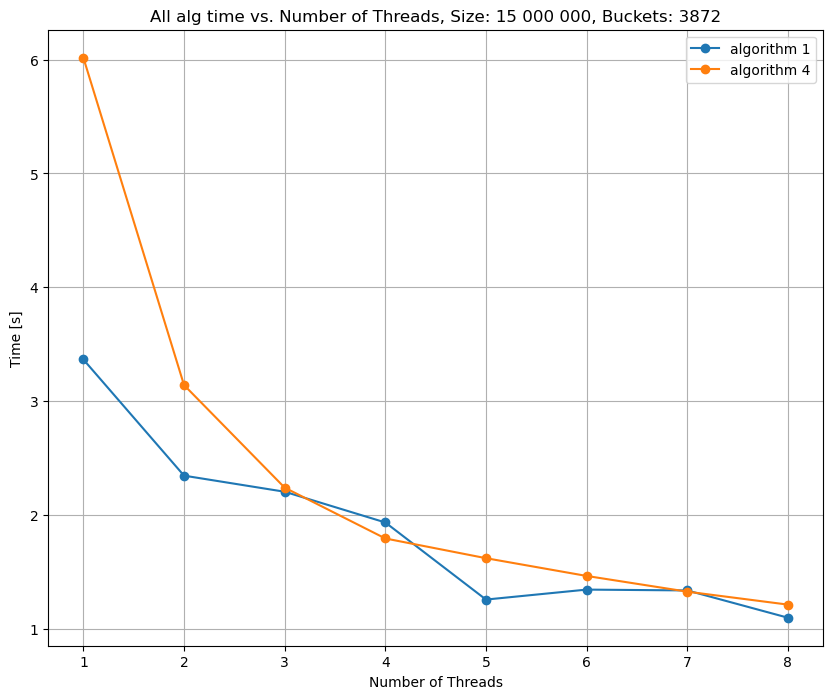

In [52]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 3872]
threads = merged_df_large_2['threads']
all_x = merged_df_large_2['all_x']
all_y = merged_df_large_2['all_y']

plt.figure(figsize=(10, 8))

plt.plot(threads, all_x, marker='o', label='algorithm 1')
plt.plot(threads, all_y, marker='o', label='algorithm 3')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('All alg time vs. Number of Threads, Size: 15 000 000, Buckets: 3872')
plt.legend()
plt.grid(True)
plt.show()

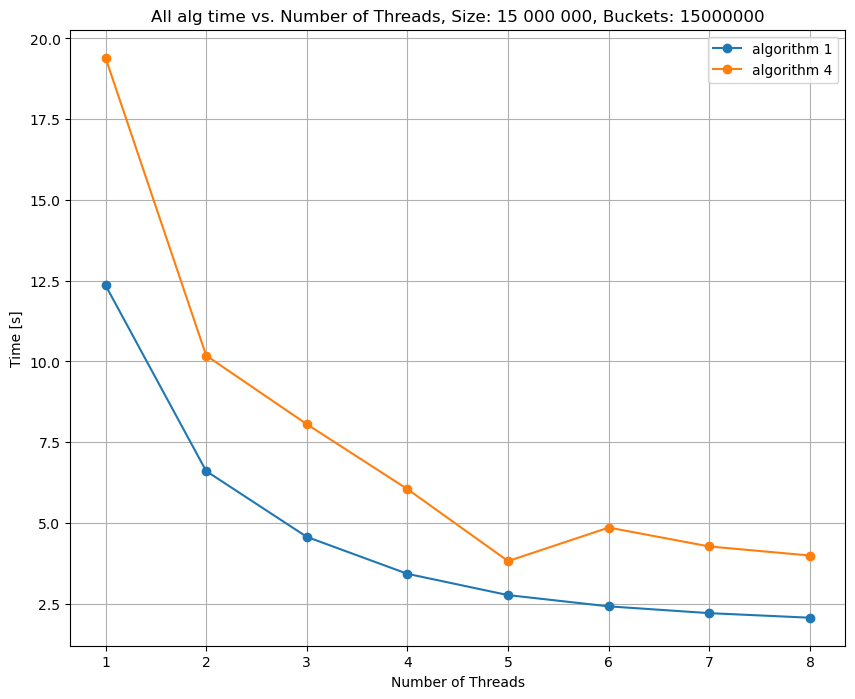

In [53]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 15000000]
threads = merged_df_large_2['threads']
all_x = merged_df_large_2['all_x']
all_y = merged_df_large_2['all_y']

plt.figure(figsize=(10, 8))

plt.plot(threads, all_x, marker='o', label='algorithm 1')
plt.plot(threads, all_y, marker='o', label='algorithm 3')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('All alg time vs. Number of Threads, Size: 15 000 000, Buckets: 15000000')
plt.legend()
plt.grid(True)
plt.show()

### Speed Up vs number of threads

#### All alg time:

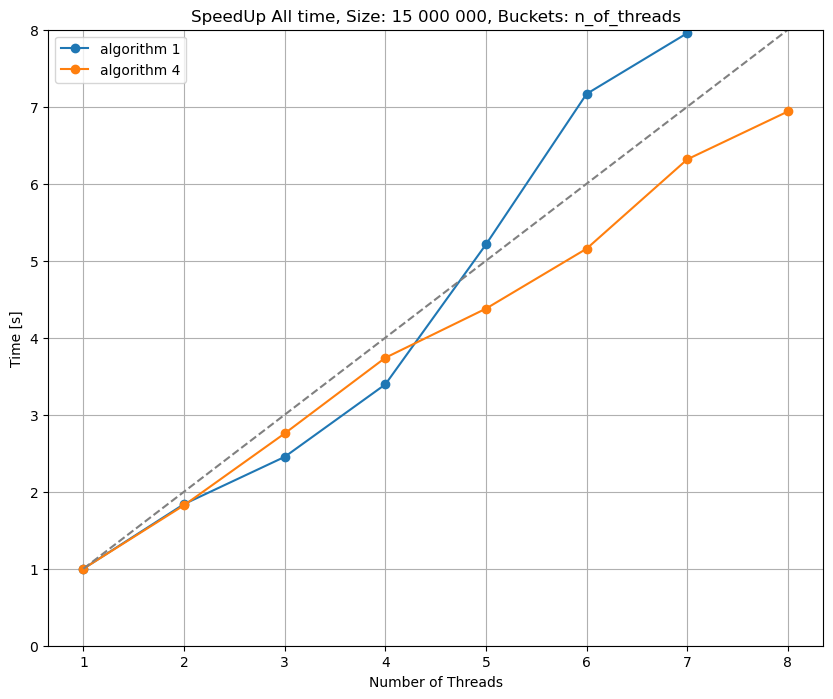

In [54]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == merged_df_large['threads']]
threads = merged_df_large_2['threads']
all_x = [merged_df_large_2['all_x'].values[0] for _ in range(8)] / merged_df_large_2['all_x']
all_y = [merged_df_large_2['all_y'].values[0] for _ in range(8)] / merged_df_large_2['all_y']

plt.figure(figsize=(10, 8))

plt.plot(threads, all_x, marker='o', label='algorithm 1')
plt.plot(threads, all_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')


plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp All time, Size: 15 000 000, Buckets: n_of_threads')
plt.legend()
plt.ylim(0, 8)

    
plt.grid(True)
plt.show()

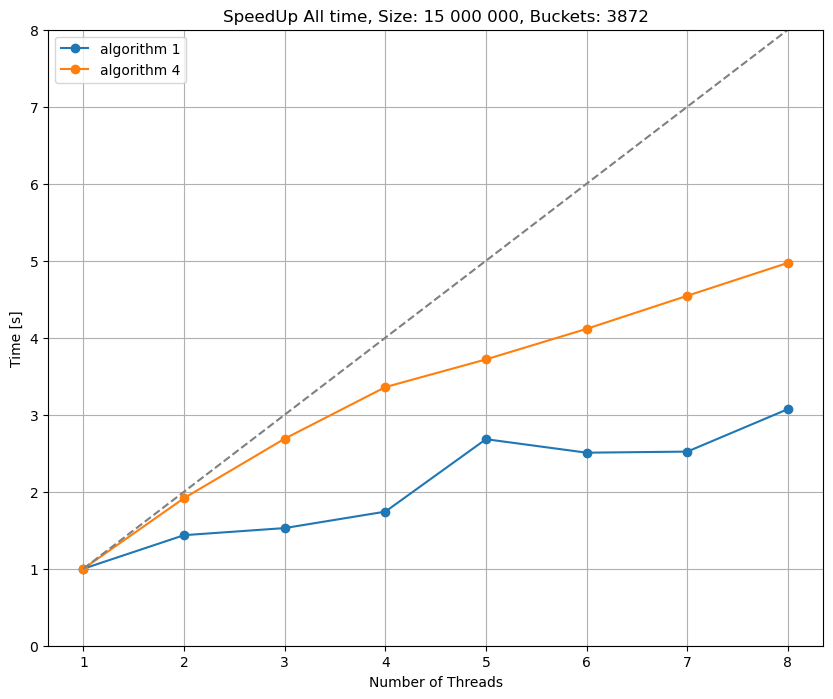

In [55]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 3872]
threads = merged_df_large_2['threads']
all_x = [merged_df_large_2['all_x'].values[0] for _ in range(8)] / merged_df_large_2['all_x']
all_y = [merged_df_large_2['all_y'].values[0] for _ in range(8)] / merged_df_large_2['all_y']

plt.figure(figsize=(10, 8))

plt.plot(threads, all_x, marker='o', label='algorithm 1')
plt.plot(threads, all_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')


plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp All time, Size: 15 000 000, Buckets: 3872')
plt.legend()
plt.ylim(0, 8)

    
plt.grid(True)
plt.show()

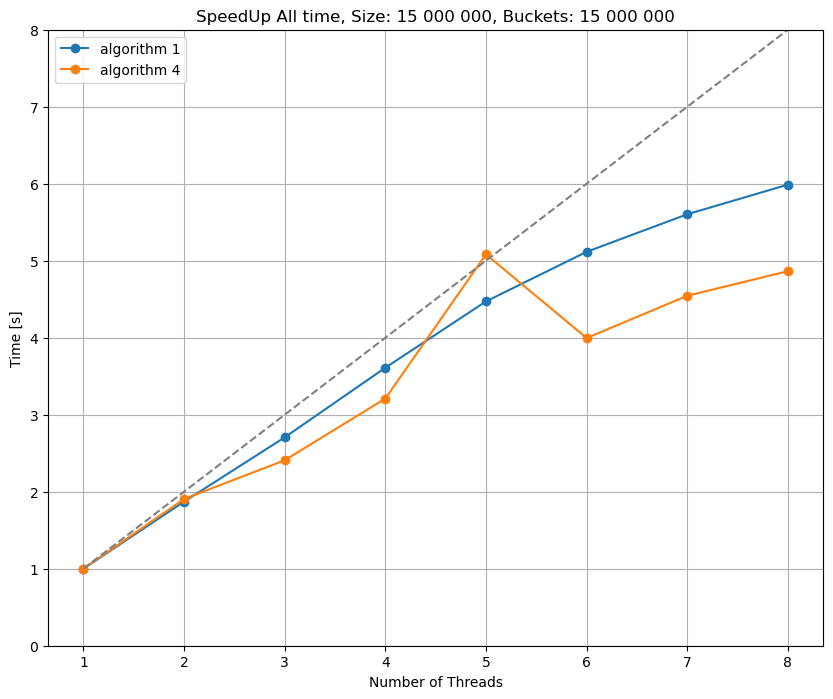

In [56]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 15000000]
threads = merged_df_large_2['threads']
all_x = [merged_df_large_2['all_x'].values[0] for _ in range(8)] / merged_df_large_2['all_x']
all_y = [merged_df_large_2['all_y'].values[0] for _ in range(8)] / merged_df_large_2['all_y']

plt.figure(figsize=(10, 8))

plt.plot(threads, all_x, marker='o', label='algorithm 1')
plt.plot(threads, all_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')


plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp All time, Size: 15 000 000, Buckets: 15 000 000')
plt.legend()
plt.ylim(0, 8)

    
plt.grid(True)
plt.show()

#### Fill Array:

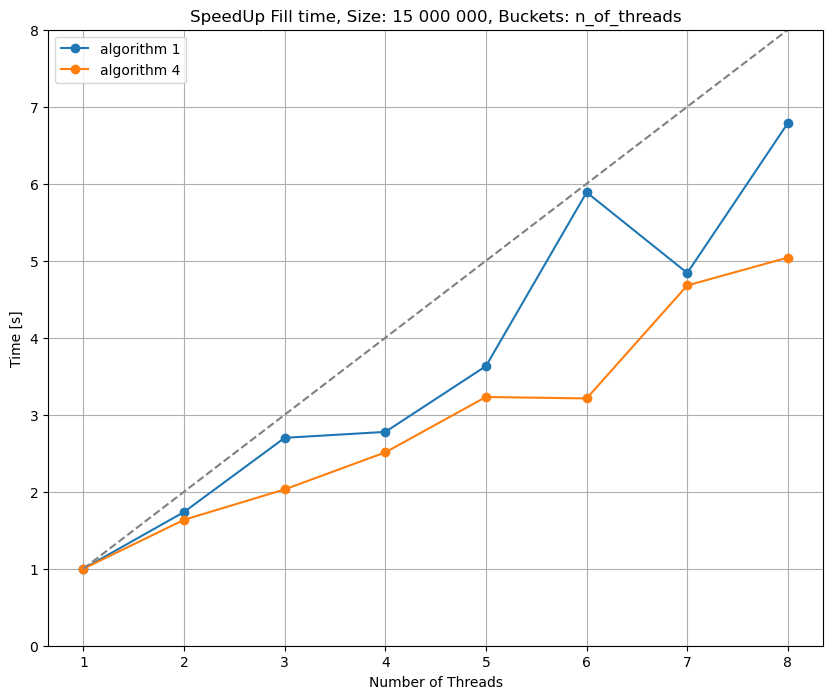

In [57]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == merged_df_large['threads']]
threads = merged_df_large_2['threads']
fill_x = [merged_df_large_2['fill_x'].values[0] / value for value in merged_df_large_2['fill_x']]
fill_y = [merged_df_large_2['fill_y'].values[0] / value for value in merged_df_large_2['fill_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, fill_x, marker='o', label='algorithm 1')
plt.plot(threads, fill_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Fill time, Size: 15 000 000, Buckets: n_of_threads')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()


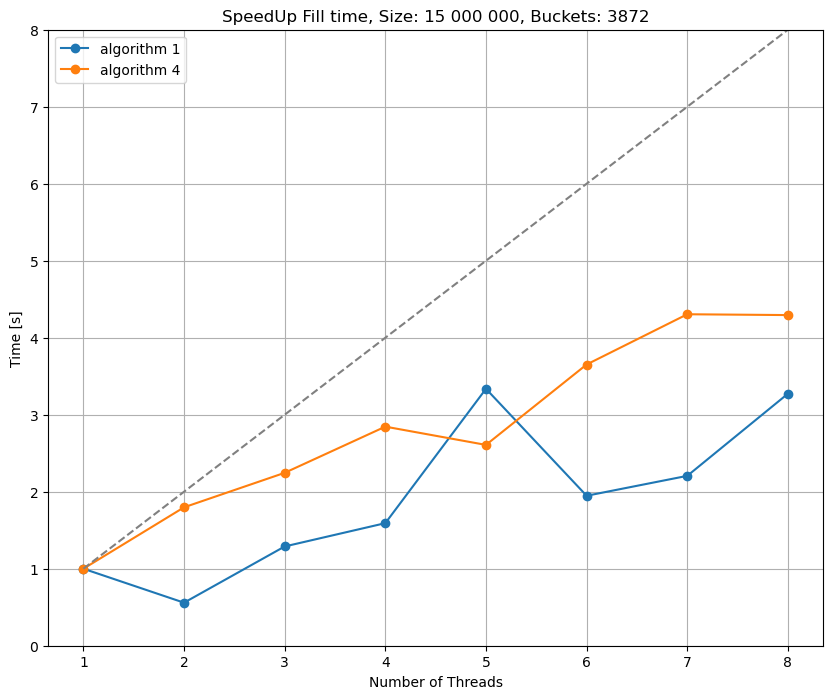

In [58]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 3872]
threads = merged_df_large_2['threads']
fill_x = [merged_df_large_2['fill_x'].values[0] / value for value in merged_df_large_2['fill_x']]
fill_y = [merged_df_large_2['fill_y'].values[0] / value for value in merged_df_large_2['fill_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, fill_x, marker='o', label='algorithm 1')
plt.plot(threads, fill_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Fill time, Size: 15 000 000, Buckets: 3872')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()

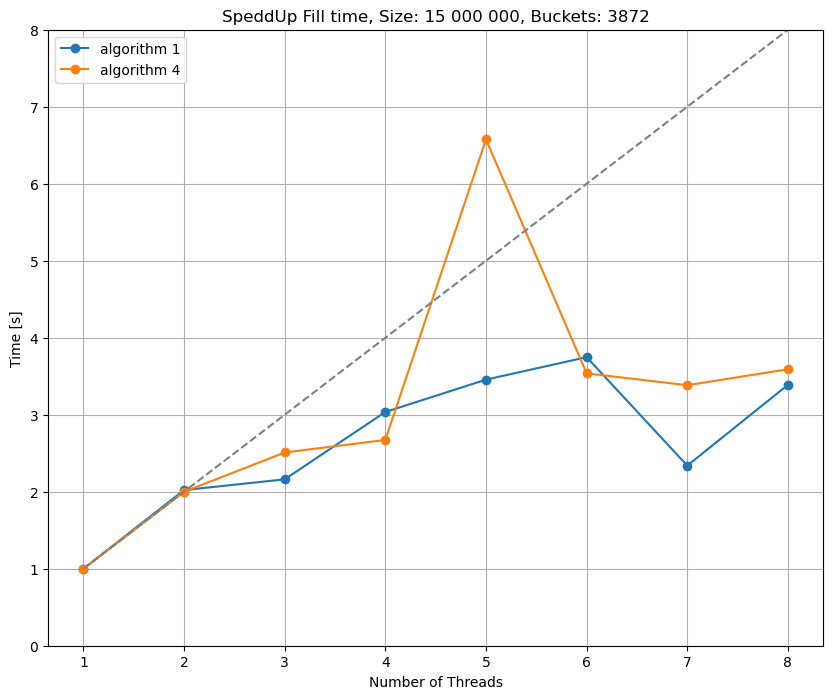

In [59]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 15000000]
threads = merged_df_large_2['threads']
fill_x = [merged_df_large_2['fill_x'].values[0] / value for value in merged_df_large_2['fill_x']]
fill_y = [merged_df_large_2['fill_y'].values[0] / value for value in merged_df_large_2['fill_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, fill_x, marker='o', label='algorithm 1')
plt.plot(threads, fill_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeddUp Fill time, Size: 15 000 000, Buckets: 3872')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()

#### Distrubute into buckets:

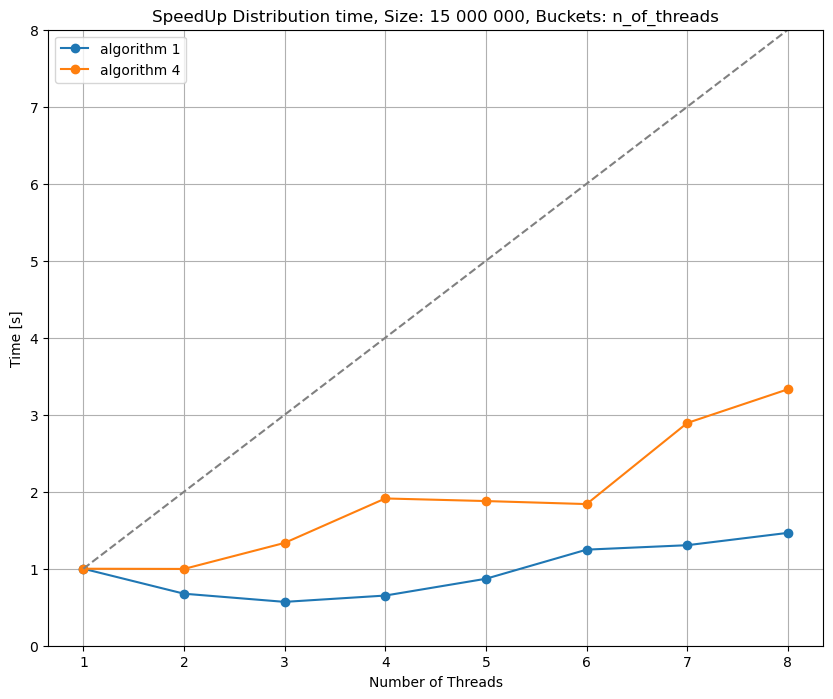

In [60]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == merged_df_large['threads']]
threads = merged_df_large_2['threads']
distrib_x = [merged_df_large_2['distrib_x'].values[0] / value for value in merged_df_large_2['distrib_x']]
distrib_y = [merged_df_large_2['distrib_y'].values[0] / value for value in merged_df_large_2['distrib_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, distrib_x, marker='o', label='algorithm 1')
plt.plot(threads, distrib_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Distribution time, Size: 15 000 000, Buckets: n_of_threads')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()


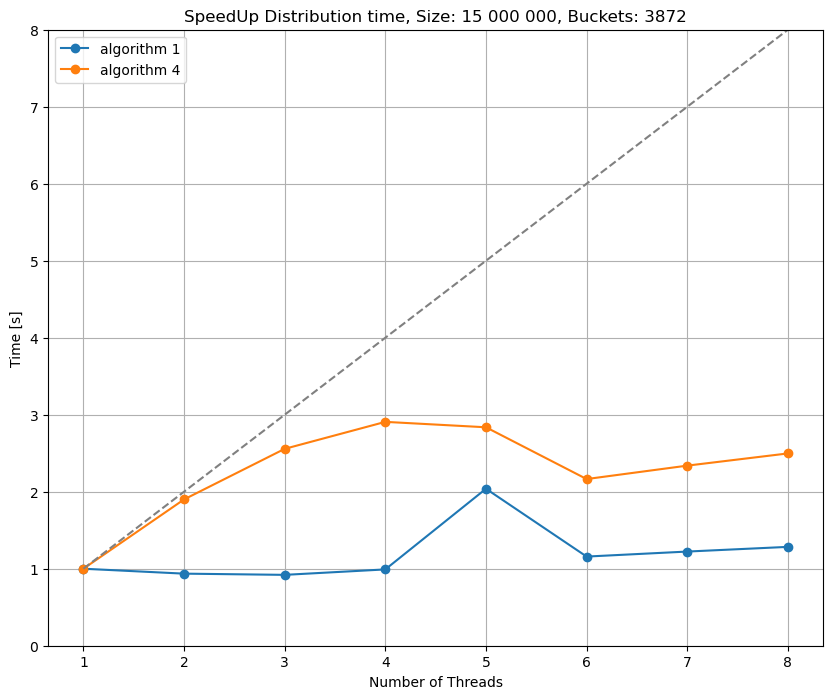

In [61]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 3872]
threads = merged_df_large_2['threads']
distrib_x = [merged_df_large_2['distrib_x'].values[0] / value for value in merged_df_large_2['distrib_x']]
distrib_y = [merged_df_large_2['distrib_y'].values[0] / value for value in merged_df_large_2['distrib_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, distrib_x, marker='o', label='algorithm 1')
plt.plot(threads, distrib_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Distribution time, Size: 15 000 000, Buckets: 3872')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()


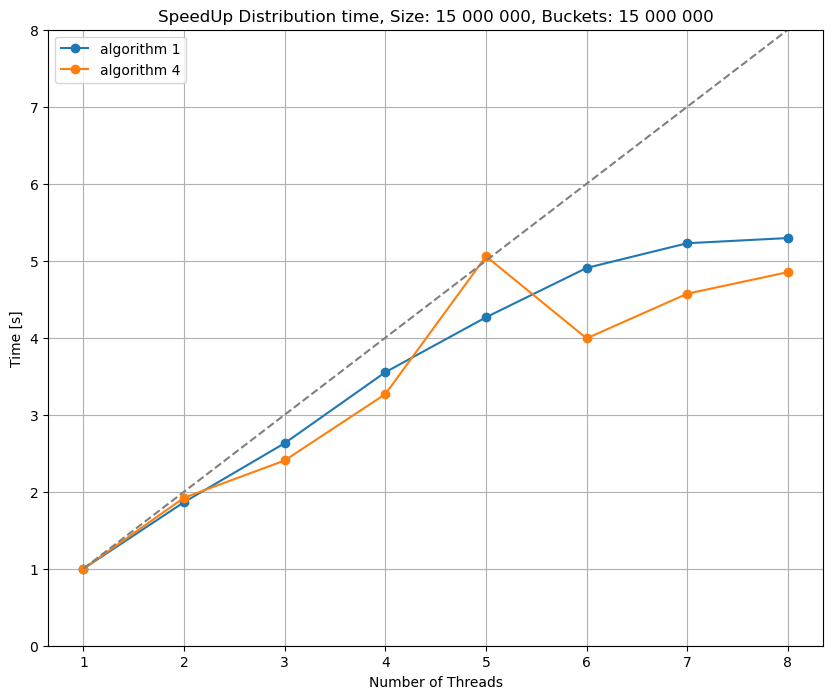

In [62]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 15000000]
threads = merged_df_large_2['threads']
distrib_x = [merged_df_large_2['distrib_x'].values[0] / value for value in merged_df_large_2['distrib_x']]
distrib_y = [merged_df_large_2['distrib_y'].values[0] / value for value in merged_df_large_2['distrib_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, distrib_x, marker='o', label='algorithm 1')
plt.plot(threads, distrib_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Distribution time, Size: 15 000 000, Buckets: 15 000 000')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()


#### Sort:

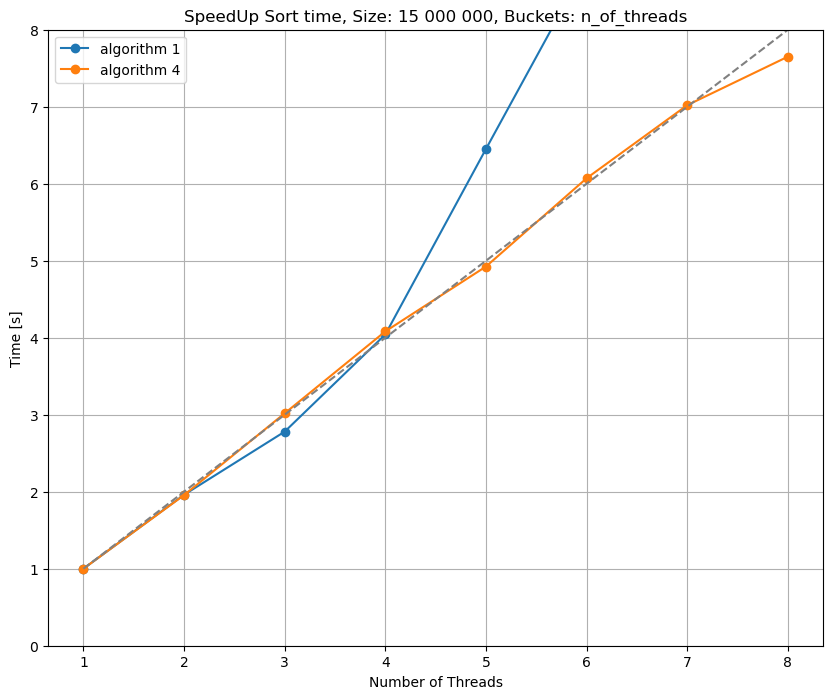

In [63]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == merged_df_large['threads']]
threads = merged_df_large_2['threads']
sort_x = [merged_df_large_2['sort_x'].values[0] / value for value in merged_df_large_2['sort_x']]
sort_y = [merged_df_large_2['sort_y'].values[0] / value for value in merged_df_large_2['sort_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, sort_x, marker='o', label='algorithm 1')
plt.plot(threads, sort_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Sort time, Size: 15 000 000, Buckets: n_of_threads')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()


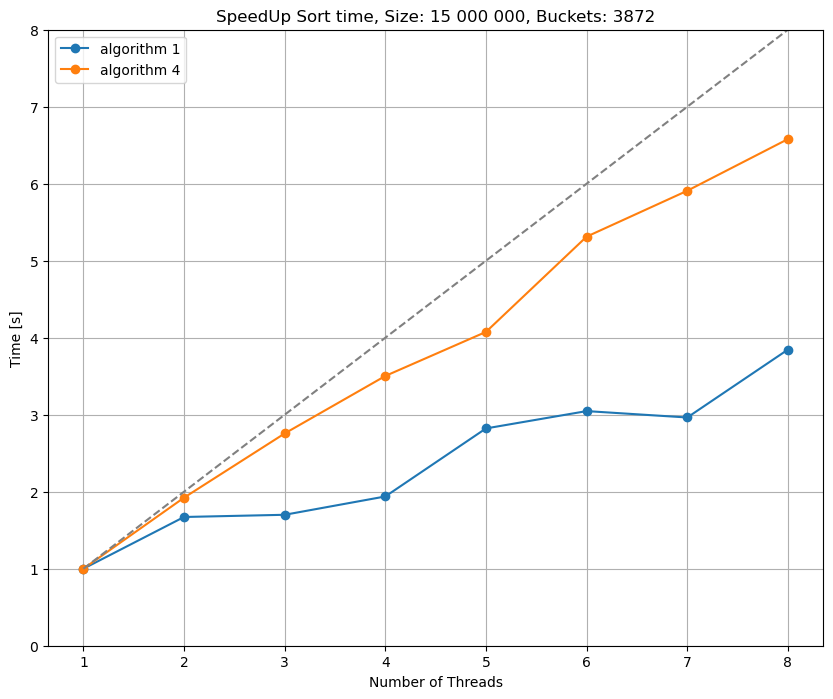

In [64]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 3872]
threads = merged_df_large_2['threads']
sort_x = [merged_df_large_2['sort_x'].values[0] / value for value in merged_df_large_2['sort_x']]
sort_y = [merged_df_large_2['sort_y'].values[0] / value for value in merged_df_large_2['sort_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, sort_x, marker='o', label='algorithm 1')
plt.plot(threads, sort_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Sort time, Size: 15 000 000, Buckets: 3872')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()


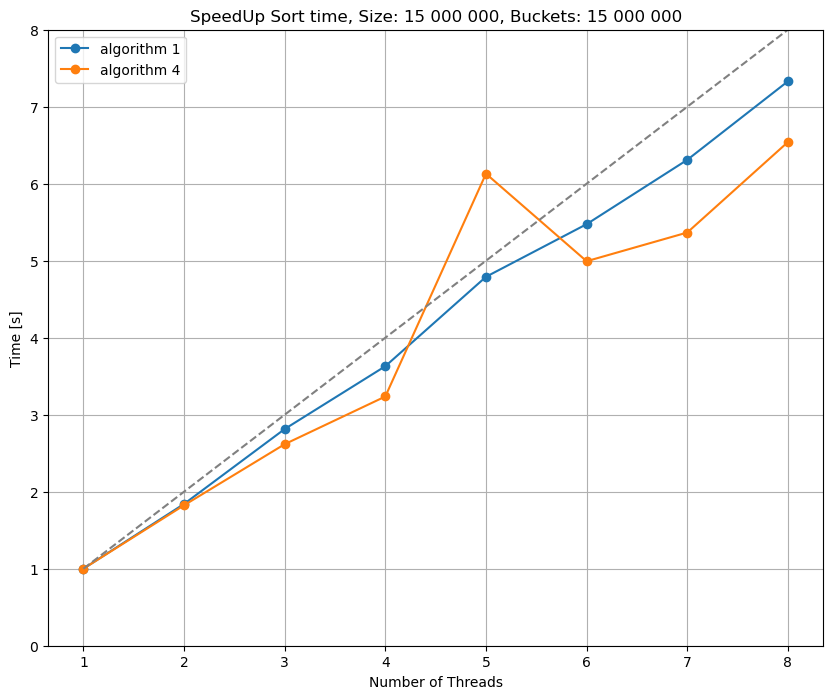

In [65]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 15000000]
threads = merged_df_large_2['threads']
sort_x = [merged_df_large_2['sort_x'].values[0] / value for value in merged_df_large_2['sort_x']]
sort_y = [merged_df_large_2['sort_y'].values[0] / value for value in merged_df_large_2['sort_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, sort_x, marker='o', label='algorithm 1')
plt.plot(threads, sort_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Sort time, Size: 15 000 000, Buckets: 15 000 000')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()


#### Rewrite to array:

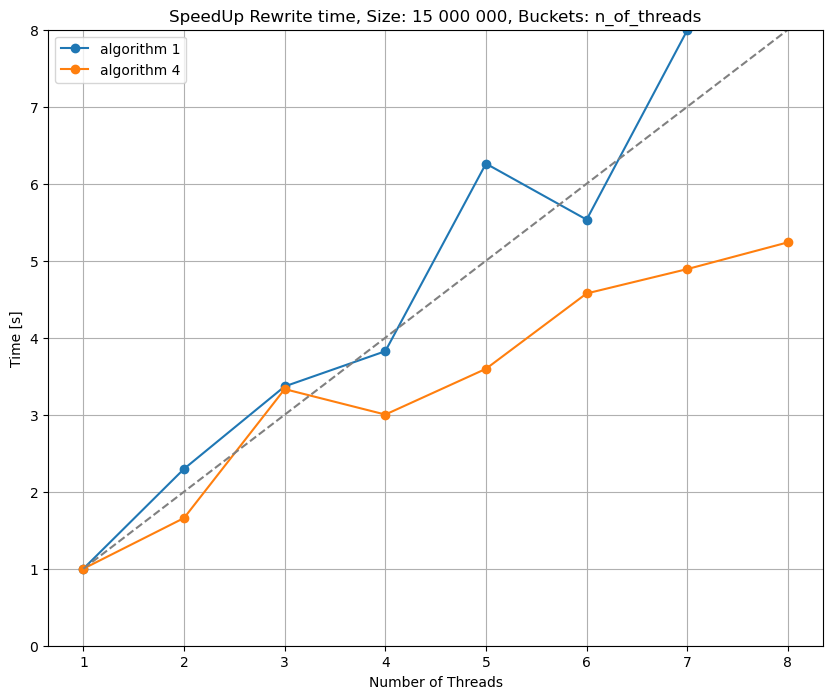

In [66]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == merged_df_large['threads']]
threads = merged_df_large_2['threads']
rewrite_x = [merged_df_large_2['rewrite_x'].values[0] / value for value in merged_df_large_2['rewrite_x']]
rewrite_y = [merged_df_large_2['rewrite_y'].values[0] / value for value in merged_df_large_2['rewrite_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, rewrite_x, marker='o', label='algorithm 1')
plt.plot(threads, rewrite_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Rewrite time, Size: 15 000 000, Buckets: n_of_threads')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()


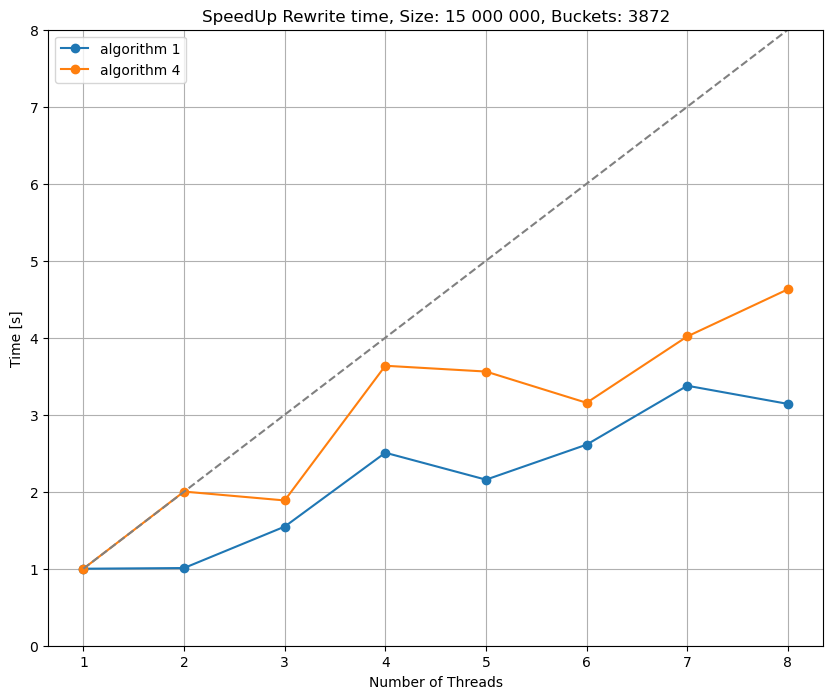

In [67]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 3872]
threads = merged_df_large_2['threads']
rewrite_x = [merged_df_large_2['rewrite_x'].values[0] / value for value in merged_df_large_2['rewrite_x']]
rewrite_y = [merged_df_large_2['rewrite_y'].values[0] / value for value in merged_df_large_2['rewrite_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, rewrite_x, marker='o', label='algorithm 1')
plt.plot(threads, rewrite_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Rewrite time, Size: 15 000 000, Buckets: 3872')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()


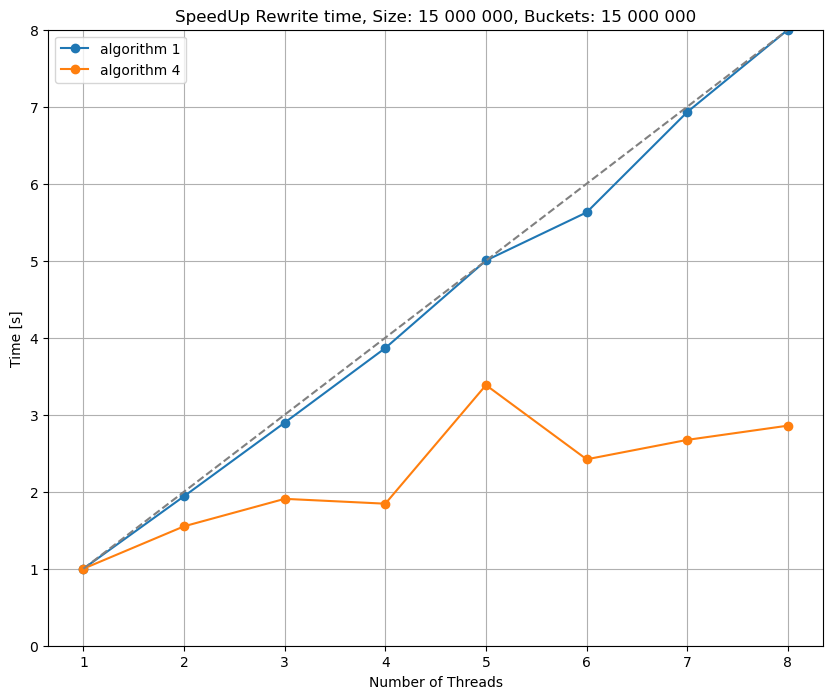

In [68]:
merged_df_large_2 = merged_df_large[merged_df_large['bucket'] == 15000000]
threads = merged_df_large_2['threads']
rewrite_x = [merged_df_large_2['rewrite_x'].values[0] / value for value in merged_df_large_2['rewrite_x']]
rewrite_y = [merged_df_large_2['rewrite_y'].values[0] / value for value in merged_df_large_2['rewrite_y']]

plt.figure(figsize=(10, 8))

plt.plot(threads, rewrite_x, marker='o', label='algorithm 1')
plt.plot(threads, rewrite_y, marker='o', label='algorithm 3')
plt.plot(threads, threads, linestyle='--', color='gray')

plt.xlabel('Number of Threads')
plt.ylabel('Time [s]')
plt.title('SpeedUp Rewrite time, Size: 15 000 000, Buckets: 15 000 000')
plt.legend()
plt.ylim(0, 8)

plt.grid(True)
plt.show()
